### Introduction

##### Part A: Gas Lift Systems 

Purpose: Gas injection reduces hydrostatic pressure, allowing reservoir pressure to push fluids to surface

Key Variables:
* Gas injection rate (too little = insufficient lift, too much = waste + instability)
* Wellhead pressure (back-pressure on system)
* Reservoir pressure (driving force)
* Water cut (affects fluid density)
* Well depth (affects hydrostatic head)

Optimization: Increasing gas injection, does not always increase oil production. There is an optimal point. Too much gas creates turbulence and can actually reduce flow.

##### Part B: Choke Flow Physics

Purpose: Chokes are production control devices. They can increase or decrease the flow rate and wellhead pressure by changing the orifice diameter. 

Key Concepts:
* Critical Flow: When pressure drop is high enough, flow becomes sonic.
* Choke Size: Measured in 64ths of an inch.

Key Variables:
* Upstream/downstream pressure (driving force)
* Fluid properties (density, viscosity)
* Gas-liquid ratio (affects flow patterns)

Optimization: In the field, engineers often adjust chokes based on intuition. We can use data and ML to find the optimal point and do better.

### Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import os
from datetime import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
choke_data=pd.read_csv('C:/Users/jayji/Choke Optimization/choke_data_20250705_234920.csv',sep=',')
gas_lift_data=pd.read_csv('C:/Users/jayji/Choke Optimization/gas_lift_data_20250705_234920.csv',sep=',')

In [4]:
choke_data.head(10)

,choke_size,upstream_pressure,downstream_pressure,glr,fluid_density,temperature,viscosity,flow_rate
0,27.736137,2860.830589,446.562288,1592.059867,32.354773,143.420453,1.102319,273.250668
1,30.566477,2026.871237,326.709539,1424.568566,51.593618,233.523454,3.337659,53.868089
2,8.926079,2289.625039,420.063581,773.874571,40.427397,125.945429,0.596663,10.000000
3,53.628352,2404.924361,295.825597,1786.074201,59.845494,238.430976,7.108464,398.563174
4,28.114831,1157.035686,148.297210,1954.080591,39.071956,178.417860,6.392879,143.249834
5,40.503417,613.074077,294.084558,1159.922313,37.162153,207.335445,6.627331,115.873185
6,12.141938,504.681860,217.000249,1174.883032,47.036716,116.536673,4.056636,32.196545
7,17.799822,1376.623207,363.874566,665.275660,55.053785,140.355032,2.478544,106.257376
8,57.822849,1103.660570,264.107206,1210.561468,35.775566,243.777791,7.343042,354.514106
9,42.086502,655.794313,426.250762,935.320409,51.282083,139.922492,8.205620,32.753940


In [5]:
gas_lift_data.head(10)

,gas_injection_rate,wellhead_pressure,reservoir_pressure,water_cut,gor,tubing_diameter,well_depth,oil_production
0,2.185431,463.357250,3018.108983,56.933432,1366.862517,4.500,14214.577362,429.003854
1,4.778214,435.427314,3390.044192,48.802246,510.295452,4.500,14785.059669,10.000000
2,3.793973,117.949446,1751.403696,27.377530,1770.310214,2.875,5106.701270,388.177896
3,3.193963,338.873479,2874.622299,0.614114,1303.609230,2.375,11227.412764,450.100863
4,1.202084,366.136933,2715.237949,47.142726,482.966990,2.375,9128.393978,376.996419
5,1.201975,379.175947,3498.491130,27.134469,1932.208503,2.375,13598.544903,502.391350
6,0.761376,506.120658,3718.261181,69.787789,1133.057834,2.375,7518.147020,459.302591
7,4.397793,473.521783,1036.470314,2.274895,331.217213,2.875,14810.294891,10.000000
8,3.205018,525.533565,3022.059757,55.558642,1328.299228,2.875,11137.079695,343.127071
9,3.686327,635.418283,1155.507397,89.440053,655.758033,2.875,12935.374022,10.000000


In [6]:
choke_data.describe()

,choke_size,upstream_pressure,downstream_pressure,glr,fluid_density,temperature,viscosity,flow_rate
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.789260,1745.518120,273.269377,1079.029406,45.250003,176.251576,5.368747,156.092683
std,16.506467,732.995581,130.344615,537.265982,8.635439,43.215588,2.783481,162.613283
min,8.008834,503.334099,50.139379,100.479664,30.018349,100.149849,0.500457,10.000000
25%,21.077858,1103.065454,159.500131,639.739681,37.863184,140.533339,2.972330,37.634281
50%,35.387418,1720.369730,273.131203,1102.092832,45.191444,176.114262,5.475793,108.805145
75%,50.376084,2411.595205,388.681765,1519.304761,52.517707,213.213773,7.757253,223.152071
max,63.935310,2995.757889,499.966172,1998.384177,59.996143,249.894921,9.999059,1398.419504


In [7]:
gas_lift_data.describe()

,gas_injection_rate,wellhead_pressure,reservoir_pressure,water_cut,gor,tubing_diameter,well_depth,oil_production
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000
mean,2.747107,450.300519,2468.098906,47.430042,1082.748719,3.28775,9906.237410,300.180838
std,1.323068,202.562961,855.538077,27.517813,516.228533,0.79090,2806.554366,180.578224
min,0.520844,100.008144,1000.092157,0.021569,200.433808,2.37500,5000.528269,10.000000
25%,1.568948,280.179690,1724.498777,23.605290,637.012144,2.37500,7549.328645,153.633908
50%,2.779528,453.500830,2462.649509,46.494628,1071.557874,2.87500,9866.940707,317.030935
75%,3.891512,628.121449,3187.779489,71.394118,1535.879973,3.50000,12250.301043,441.049873
max,4.998730,798.843258,3998.673110,94.938279,1999.029226,4.50000,14986.173192,754.371981


In [8]:
dftype = pd.DataFrame(choke_data.dtypes, columns=['Data_Type'])
dftype['Number_Unique'] = choke_data.nunique()
dftype['Number_of_Nan'] = choke_data.isna().sum()
skew_vals = choke_data.skew(numeric_only=True)
dftype['Skewness'] = skew_vals
dftype

,Data_Type,Number_Unique,Number_of_Nan,Skewness
choke_size,float64,1500,0,0.046750
upstream_pressure,float64,1500,0,0.036571
downstream_pressure,float64,1500,0,-0.014406
glr,float64,1500,0,-0.089175
fluid_density,float64,1500,0,-0.040634
temperature,float64,1500,0,-0.012117
viscosity,float64,1500,0,-0.069788
flow_rate,float64,1277,0,2.280491


In [9]:
dftype = pd.DataFrame(gas_lift_data.dtypes, columns=['Data_Type'])
dftype['Number_Unique'] = gas_lift_data.nunique()
dftype['Number_of_Nan'] = gas_lift_data.isna().sum()
skew_vals = gas_lift_data.skew(numeric_only=True)
dftype['Skewness'] = skew_vals
dftype

,Data_Type,Number_Unique,Number_of_Nan,Skewness
gas_injection_rate,float64,1500,0,-0.007455
wellhead_pressure,float64,1500,0,-0.021297
reservoir_pressure,float64,1500,0,0.028532
water_cut,float64,1500,0,0.033379
gor,float64,1500,0,0.070550
tubing_diameter,float64,4,0,0.417037
well_depth,float64,1500,0,0.032907
oil_production,float64,1341,0,-0.079263


Outliers in flow_rate: 61 out of 1500 (4.07%)


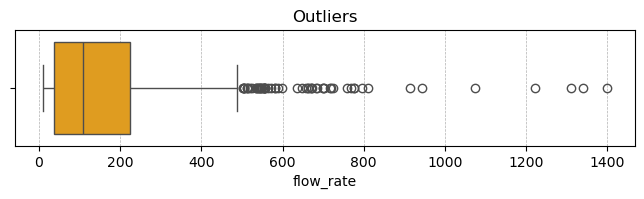

In [10]:
series = choke_data['flow_rate']

Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (series < lower_bound) | (series > upper_bound)
outlier_count = outlier_mask.sum()
total_count = series.shape[0]
outlier_percent = (outlier_count / total_count) * 100

print(f"Outliers in flow_rate: {outlier_count} out of {total_count} ({outlier_percent:.2f}%)")

plt.figure(figsize=(8, 1.5))
sns.boxplot(x=series, color='orange')
plt.title(f"Outliers")
plt.xlabel('flow_rate')
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.show()

In [11]:
outliers_df = choke_data[(choke_data['flow_rate'] < lower_bound) | (choke_data['flow_rate'] > upper_bound)]
outliers_df.sample(10)

,choke_size,upstream_pressure,downstream_pressure,glr,fluid_density,temperature,viscosity,flow_rate
361,56.709492,2490.864439,304.431526,766.431108,57.922182,233.400642,1.210200,663.583389
1274,56.769872,2877.726699,450.498867,1851.569707,43.713617,160.900866,1.934269,698.623623
268,59.236186,2793.257864,226.457535,1171.456470,33.190924,180.200013,5.214470,554.726158
597,59.926833,2134.511648,479.577817,1827.237800,32.907253,168.003031,3.847291,661.755141
1098,58.103786,2396.684712,262.212168,1061.040299,30.765406,190.836802,3.281123,512.846389
1427,38.477258,2630.888651,444.000494,306.875070,44.029744,189.429467,0.532950,588.811498
255,62.592862,2147.086751,122.231937,1611.882658,41.423512,174.997530,1.901098,809.962646
61,63.817091,2600.840596,262.243761,649.953469,30.464998,247.821310,4.760899,555.037974
427,61.637882,1816.874375,62.602394,1514.527941,56.060817,168.224466,1.189803,724.168514
377,62.557581,2643.537117,397.912403,1135.862575,58.713197,154.233324,2.616202,505.759424


In [12]:
choke_data.sample(10)

,choke_size,upstream_pressure,downstream_pressure,glr,fluid_density,temperature,viscosity,flow_rate
474,27.543716,1707.383408,306.070959,1204.181038,56.157420,216.312177,4.405988,38.574744
692,52.420862,1658.880558,261.341760,170.739283,41.525675,123.936585,1.013376,232.028370
1185,17.718067,830.709270,184.586095,1259.491065,46.061926,197.675258,3.429626,27.846866
605,51.598969,1192.254224,282.656626,1262.801781,32.016859,123.725484,0.557209,547.556653
1000,17.274723,2150.006511,414.160627,1492.571982,37.391142,238.723240,8.549017,38.612786
806,8.863249,2926.977476,494.895450,1322.918608,49.911398,190.584295,1.489622,10.000000
1395,43.902690,1995.484696,452.950391,1580.280986,39.909831,109.400820,6.536296,111.592001
436,10.896369,1010.661896,222.674979,1366.630185,50.451853,212.660572,3.401656,10.000000
808,24.829498,2908.006602,137.372935,1958.624970,56.133964,119.203714,6.980680,10.000000
667,25.577245,936.026358,55.587240,808.571052,36.403480,143.876154,6.301100,10.000000


In [13]:
outliers_df = choke_data[(choke_data['flow_rate'] < lower_bound) | (choke_data['flow_rate'] > 1000)]
outliers_df

,choke_size,upstream_pressure,downstream_pressure,glr,fluid_density,temperature,viscosity,flow_rate
468,63.754088,1723.180565,147.507910,1187.874362,37.436909,211.870157,0.561270,1398.419504
591,58.300835,2569.675949,309.946098,1136.401042,34.990882,203.785347,0.601867,1340.139054
596,55.913747,2142.055766,263.133840,1600.872170,30.619856,180.480366,0.607060,1310.769379
1109,54.872437,2789.980003,426.606550,1586.527877,36.522505,192.323263,0.657854,1221.838192
1150,54.132666,2534.090060,214.706026,1762.612032,50.757943,206.309850,0.800538,1075.192895


### Train Gas Lift Model

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = gas_lift_data.drop('oil_production', axis=1)
y = gas_lift_data['oil_production']
        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler_gas_lift = StandardScaler()
        
x_train = scaler_gas_lift.fit_transform(x_train)
x_test = scaler_gas_lift.transform(x_test)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

dt_lift_model = DecisionTreeRegressor(max_depth=13, random_state=42)

grid_search = GridSearchCV(dt_lift_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Neg. MSE):", grid_search.best_score_)

best_dt_lift_model = grid_search.best_estimator_
y_pred = best_dt_lift_model.predict(x_test)

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score (Neg. MSE): -7225.961437042977


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
        
print("\n=== Gas Lift Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


=== Gas Lift Model Performance ===
R² Score: 0.7921
MSE: 7334.5456
MAE: 64.0898


In [17]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['None', 'sqrt', 'log2'],
            'bootstrap': [True, False]
        }
        
rf_lift_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_lift_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (neg MSE):", grid_search.best_score_)
        
best_rf_lift_model = grid_search.best_estimator_
y_pred = best_rf_lift_model.predict(x_test)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (neg MSE): 0.8673489365138091


In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
        
print("\n=== Gas Lift Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


=== Gas Lift Model Performance ===
R² Score: 0.8784
MSE: 4291.3121
MAE: 51.0122


In [19]:
from xgboost import XGBRegressor

xgb_lift_model = XGBRegressor(verbosity=0, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],    
    'reg_alpha': [0.1],               # L1 regularization
    'reg_lambda': [10.0]             # L2 regularization
}

grid = GridSearchCV(
    estimator=xgb_lift_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)

best_xgb_lift_model = grid.best_estimator_
y_pred = best_xgb_lift_model.predict(x_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10.0}
Best R² Score: 0.8991322442264911


In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
        
print("\n=== Gas Lift Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


=== Gas Lift Model Performance ===
R² Score: 0.9081
MSE: 3243.6347
MAE: 44.7981


### Train Choke Model

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = choke_data.drop('flow_rate', axis=1)
y = choke_data['flow_rate']
        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler_choke = StandardScaler()
        
x_train = scaler_choke.fit_transform(x_train)
x_test = scaler_choke.transform(x_test)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

dt_choke_model = DecisionTreeRegressor(max_depth=13, random_state=42)

grid_search = GridSearchCV(dt_choke_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Neg. MSE):", grid_search.best_score_)

best_dt_choke_model = grid_search.best_estimator_
y_pred = best_dt_choke_model.predict(x_test)

Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score (Neg. MSE): -8449.530169195397


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
        
print("\n=== Choke Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


=== Choke Model Performance ===
R² Score: 0.7774
MSE: 7281.3730
MAE: 61.0969


In [24]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['None', 'sqrt', 'log2'],
            'bootstrap': [True, False]
        }
        
rf_choke_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_choke_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (neg MSE):", grid_search.best_score_)
        
best_rf_choke_model = grid_search.best_estimator_
y_pred = best_rf_choke_model.predict(x_test)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (neg MSE): 0.7841143523918027


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
        
print("\n=== Choke Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


=== Choke Model Performance ===
R² Score: 0.8335
MSE: 5445.3450
MAE: 52.5707


In [26]:
from xgboost import XGBRegressor

xgb_choke_model = XGBRegressor(verbosity=0, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0],             # L1 regularization
    'reg_lambda': [10.0]            # L2 regularization
}

grid = GridSearchCV(
    estimator=xgb_choke_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)

best_xgb_choke_model = grid.best_estimator_
y_pred = best_xgb_choke_model.predict(x_test)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 10.0}
Best R² Score: 0.8609120663977023


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
        
print("\n=== Choke Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


=== Choke Performance ===
R² Score: 0.8817
MSE: 3869.8128
MAE: 45.6471


### Optimize Gas Lift

In [28]:
def optimize_gas_lift(well_conditions, gas_lift_model, scaler_gas_lift,
                      gas_rate_range=(0.5, 5.0), n_points=100):
    
    gas_rates = np.linspace(gas_rate_range[0], gas_rate_range[1], n_points)

    optimization_data = [
        {'gas_injection_rate': rate, **well_conditions}
        for rate in gas_rates
    ]
    optimization_df = pd.DataFrame(optimization_data)

    x_scaled = scaler_gas_lift.transform(optimization_df)

    predicted_production = gas_lift_model.predict(x_scaled)

    optimal_idx = np.argmax(predicted_production)
    optimal_gas_rate = gas_rates[optimal_idx]
    optimal_production = predicted_production[optimal_idx]

    # Display results
    print(f"\n=== Gas Lift Optimization Results ===")
    print(f"Optimal Gas Injection Rate: {optimal_gas_rate:.2f} MMscf/day")
    print(f"Expected Oil Production: {optimal_production:.2f} bbl/day")

    # Return results
    return {
        'optimal_gas_rate': float(optimal_gas_rate),
        'optimal_production': float(optimal_production),
        'gas_rates': gas_rates,
        'predicted_production': predicted_production
    }

In [29]:
well_conditions = {
    'wellhead_pressure': 300,
    'reservoir_pressure': 2500,
    'water_cut': 30,
    'gor': 800,
    'tubing_diameter': 3.5,
    'well_depth': 10000
}

# Load your trained model and scaler
model = best_xgb_lift_model
scaler = scaler_gas_lift

gas_lift_results = optimize_gas_lift(well_conditions, model, scaler)


=== Gas Lift Optimization Results ===
Optimal Gas Injection Rate: 1.73 MMscf/day
Expected Oil Production: 480.47 bbl/day


In [30]:
def plot_gas_lift_results(gas_lift_results):
    
    if not gas_lift_results:
        print("No gas lift results provided.")
        return

    plt.figure(figsize=(8, 6))
    plt.plot(gas_lift_results['gas_rates'],
             gas_lift_results['predicted_production'],
             'b-', linewidth=2, label='Predicted Production')
    
    plt.scatter(gas_lift_results['optimal_gas_rate'],
                gas_lift_results['optimal_production'],
                color='red', s=50, zorder=5, label='Optimal Point')
    
    plt.xlabel('Gas Injection Rate (MMscf/day)')
    plt.ylabel('Oil Production (bbl/day)')
    plt.title('Gas Lift Optimization')
    plt.grid(True, alpha=0.3)
    
    plt.annotate(f'Optimal: {gas_lift_results["optimal_gas_rate"]:.2f} MMscf/day',
                 xy=(gas_lift_results['optimal_gas_rate'], gas_lift_results['optimal_production']),
                 xytext=(10, 10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.legend()
    plt.tight_layout()
    plt.show()

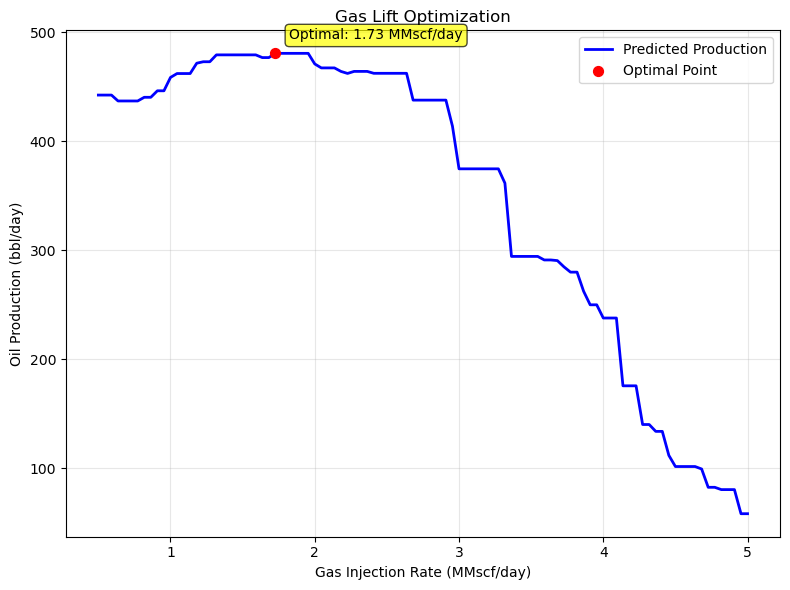

In [31]:
plot_gas_lift_results(gas_lift_results)

### Optimize Choke 

In [32]:
def optimize_choke(flow_conditions, choke_model, scaler_choke,
                   choke_size_range=(8, 64), n_points=100):
    
    choke_sizes = np.linspace(choke_size_range[0], choke_size_range[1], n_points)

    optimization_data = [
        {'choke_size': size, **flow_conditions}
        for size in choke_sizes
    ]
    optimization_df = pd.DataFrame(optimization_data)

    x_scaled = scaler_choke.transform(optimization_df)

    # Predict flow rate
    predicted_flow = choke_model.predict(x_scaled)

    # Find optimal choke size
    optimal_idx = np.argmax(predicted_flow)
    optimal_choke_size = choke_sizes[optimal_idx]
    optimal_flow = predicted_flow[optimal_idx]

    # Display results
    print(f"\n=== Choke Optimization Results ===")
    print(f"Optimal Choke Size: {optimal_choke_size:.2f}/64 inches")
    print(f"Expected Flow Rate: {optimal_flow:.2f} bbl/day")

    return {
        'optimal_choke_size': float(optimal_choke_size),
        'optimal_flow': float(optimal_flow),
        'choke_sizes': choke_sizes,
        'predicted_flow': predicted_flow
    }

In [33]:
flow_conditions = {
    'upstream_pressure': 2000,
    'downstream_pressure': 500,
    'glr': 600,
    'fluid_density': 0.8,
    'temperature': 200,
    'viscosity': 6
}

model = best_xgb_choke_model
scaler = scaler_choke

choke_results = optimize_choke(flow_conditions, model, scaler)


=== Choke Optimization Results ===
Optimal Choke Size: 63.43/64 inches
Expected Flow Rate: 337.86 bbl/day


In [34]:
def plot_choke_results(choke_results):
    
    plt.figure(figsize=(8, 6))

    plt.plot(choke_results['choke_sizes'], 
             choke_results['predicted_flow'], 
             'g-', linewidth=2, label='Predicted Flow')

    plt.scatter(choke_results['optimal_choke_size'], 
                choke_results['optimal_flow'], 
                color='red', s=50, label='Optimal Point')

    plt.xlabel('Choke Size (1/64th inch)')
    plt.ylabel('Flow Rate (bbl/day)')
    plt.title('Choke Size Optimization')
    plt.grid(True, alpha=0.3)

    plt.annotate(f'Optimal: {choke_results["optimal_choke_size"]:.2f}/64"',
                 xy=(choke_results['optimal_choke_size'], 
                     choke_results['optimal_flow']),
                 xytext=(10, 10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    plt.legend()
    plt.tight_layout()
    plt.show()

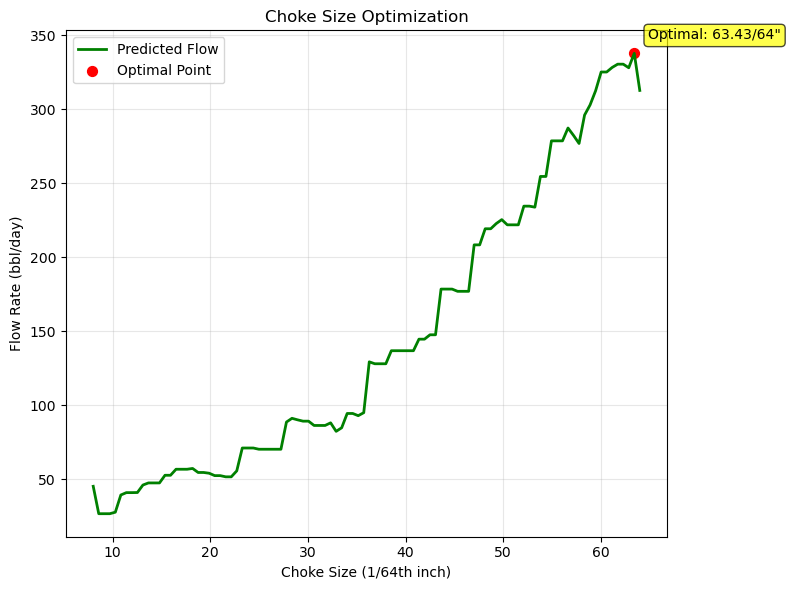

In [35]:
plot_choke_results(choke_results)

### Feature Importance

In [36]:
def plot_gas_lift_feature_importance(gas_lift_model, gas_lift_data):
    
    features = list(gas_lift_data.drop('oil_production', axis=1).columns)
    importance = gas_lift_model.feature_importances_
    
    sorted_idx = np.argsort(importance)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(features)), importance[sorted_idx])
    plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=45)
    plt.title('Gas Lift Model - Feature Importance')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


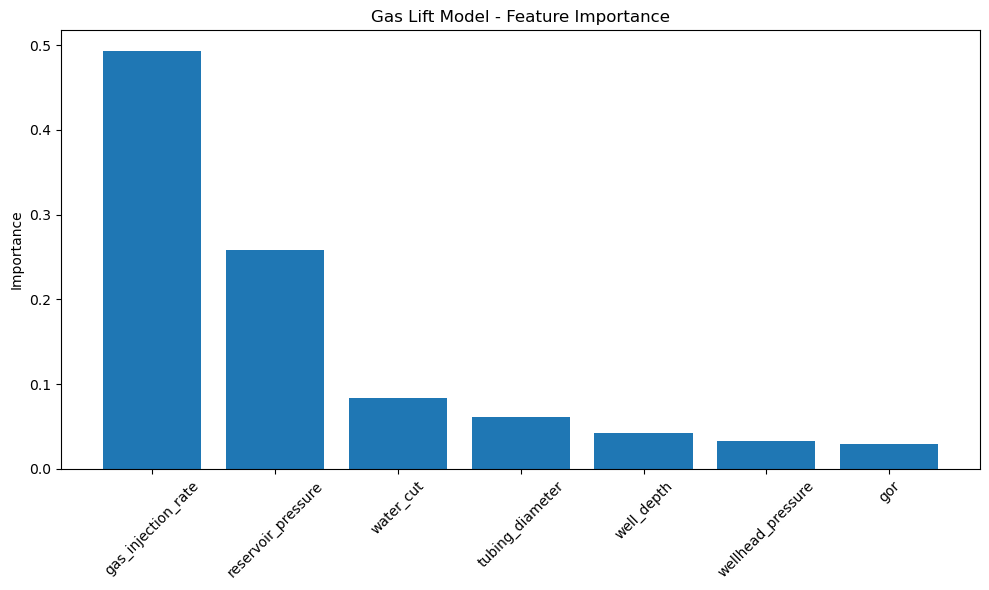

In [37]:
plot_gas_lift_feature_importance(best_xgb_lift_model, gas_lift_data)

In [38]:
def plot_choke_feature_importance(choke_model, choke_data):
    
    features = list(choke_data.drop('flow_rate', axis=1).columns)
    importance = choke_model.feature_importances_

    sorted_idx = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(features)), importance[sorted_idx])
    plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=45)
    plt.title('Choke Model - Feature Importance')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


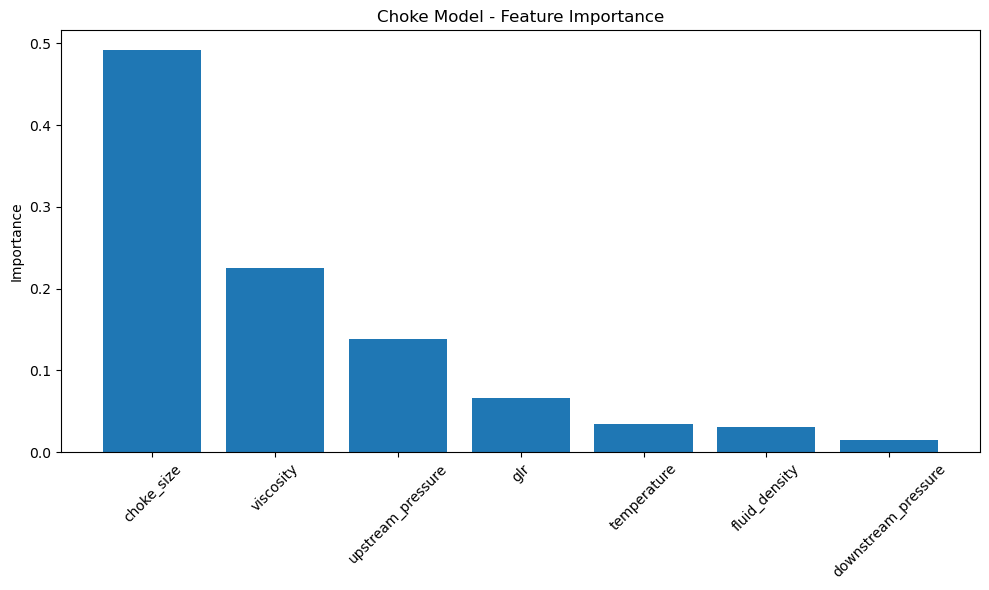

In [39]:
plot_choke_feature_importance(best_xgb_choke_model, choke_data)

### Conclusion

The Gas Lift & Choke Optimization project successfully integrates petroleum engineering principles with modern machine learning techniques to solve a high-value production challenge. By combining well site data with ensemble ML models such as Decision Tree, Random Forest and XGBoost, the system can accurately predict oil production and determine optimal operating parameters for gas lift and choke settings. The approach demonstrates significant potential for boosting production efficiency, reducing manual intervention, and supporting data-driven decision-making in the field.

The project’s emphasis on reproducible workflows make it suitable for both academic teaching and industrial adaptation. Its framework’s flexibility allows for future integration of real-time SCADA data and advanced AI methods such as reinforcement learning. Ultimately, this work showcases how physics-aware ML can enhance operational performance, maximize economic returns, and prepare engineers for the evolving digital oilfield.